In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials# Authenticate and create the PyDrive client.
import pandas as pd

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = "1OSTvlL4jnS3s9qqsECR1dbsIN2oS-hCg"
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('gene.exp1.csv')  
gene_1 = pd.read_csv('gene.exp1.csv')

In [3]:
gene1 = gene_1.drop(columns = ["Cancer_Type", "Sample_ID"])


In [4]:
id = '1lHfBKYnTspUvUP0K3GTOu12LuWJRsRxb'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('gene.exp2.csv')  
gene_2 = pd.read_csv('gene.exp2.csv')

In [5]:
gene2 = gene_2.drop(columns = ["Cancer_Type", "Sample_ID"])


In [6]:
id = '1m88M2hdXKlI10-r3SXBosZh1IC88lF6o'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('gene.exp3.csv')  
gene_3 = pd.read_csv('gene.exp3.csv')

In [7]:
gene3 = gene_3.drop(columns = ["Cancer_Type", "Sample_ID"])

In [8]:
id = '1G5u4z7Eq15z8fgwZy5iAPnOHpZ0ZOAj0'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('gene.exp4.csv')  
gene_4 = pd.read_csv('gene.exp4.csv')

In [9]:
gene4 = gene_4.drop(columns = ["Cancer_Type", "Sample_ID"])

In [10]:
id = '1ZcUmJ5CF4hjqKXwYy02m0bkkPFV2ql8p'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('gene.exp5.csv')  
gene_5 = pd.read_csv('gene.exp5.csv')

In [11]:
gene5 = gene_5.drop(columns = ["Cancer_Type", "Sample_ID"])

In [12]:
gene = gene1.append(gene2).reset_index(drop = 'True')
gene = gene.append(gene3).reset_index(drop = 'True')
gene = gene.append(gene4).reset_index(drop = 'True')
gene = gene.append(gene5).reset_index(drop = 'True')
gene = gene.drop(columns=gene.columns[(gene == 0).any()])

In [13]:
gene.head

<bound method NDFrame.head of       ENSG00000141510  ENSG00000155657  ...  ENSG00000261884  ENSG00000280433
0            2.192755         0.096436  ...         0.081008         0.214351
1           10.143098         0.034079  ...         0.313507         0.527012
2            5.279143         0.044035  ...         0.227274         0.395361
3            8.187246         0.045650  ...         0.253766         0.263516
4            9.159486         0.066672  ...         0.689233         0.468747
...               ...              ...  ...              ...              ...
4995        13.765803         0.161222  ...         0.144754         0.279973
4996        18.878902         0.073222  ...         0.244456         0.256835
4997        14.561692         0.027594  ...         0.553830         0.474120
4998        15.179380         0.038970  ...         0.328830         0.617260
4999        16.174604         0.027587  ...         0.309715         0.329054

[5000 rows x 11150 columns]>

In [14]:
id = '1NzOt6dy1Yfqidkrhs_QwxqFbxo3REbzm'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('pro.exp.mapped.all.sort.csv')  
protein = pd.read_csv('pro.exp.mapped.all.sort.csv')

In [15]:
pro = protein[:5000]
print(set(list(pro["Cancer_Type"])))

{'BLCA', 'OV', 'CESC', 'PAAD', 'LUAD', 'DLBC', 'KIRC', 'LUSC', 'GBM', 'BRCA', 'COAD', 'CHOL', 'PRAD', 'HNSC', 'PCPG', 'LIHC', 'KIRP', 'MESO', 'KICH', 'ACC', 'ESCA', 'LGG'}


In [16]:
lable = list(pro.Cancer_Type)
pro = pro.drop(columns = ["Cancer_Type", "Sample_ID"])

print(len(set(lable)))

22


In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le = LabelEncoder()
lable = np.ravel(lable)
le.fit(lable)
lable1 = le.transform(lable)


In [18]:
import keras.utils as np_utils
cat = np_utils.to_categorical(lable1)
cat1 = pd.DataFrame({'tag' + str(i) : cat[:, i]for i in range(len(cat[0]))})
cat1 = cat1[:gene.shape[0]]
print(cat)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [19]:
from keras.layers import Input, Dense, BatchNormalization, Lambda, GaussianNoise, GaussianDropout
from keras.models import Model
import keras.backend as backend
import numpy as np
import keras
from sklearn.preprocessing import LabelEncoder, normalize
from keras.utils import np_utils
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import time

Instructions for updating:
non-resource variables are not supported in the long term


In [20]:
def model(m_rna_train, pro_train,label_train, m_rna_test, pro_test, label_test):
        opt = keras.optimizers.Nadam(learning_rate=1e-3)

        inputs = Input(shape=(m_rna_train.shape[1],), name="inputs")
        inputs_noise = GaussianNoise(stddev=0.25)(inputs)
        inputs_noise = GaussianDropout(rate=0.5 ** 2 / (1 + 0.5 ** 2))(inputs_noise)
        inputs_0 = BatchNormalization(name="inputs_0")(inputs_noise)
        inputs_1 = Dense(1024, activation="relu", name="inputs_1")(inputs_0)
        inputs_2 = BatchNormalization(name="inputs_2")(inputs_1)
        inputs_3 = Dense(256, activation="relu", name="inputs_3")(inputs_2)
        inputs_4 = BatchNormalization(name="inputs_4")(inputs_3)
        inputs_5 = Dense(64, activation="softplus", name="inputs_5")(inputs_4)
        inputs_6 = BatchNormalization(name="inputs_6")(inputs_5)

        encoded = Dense(units=12, activation='relu', name='encoded')(inputs_6)

        inputs_7 = Dense(64, activation="softplus", name="inputs_7")(encoded)
        inputs_8 = Dense(256, activation="relu", name="inputs_8")(inputs_7)
        inputs_9 = Dense(1024, activation="relu", name="inputs_9")(inputs_8)

        inputs_10 = Dense(128, activation='softplus', name = 'inputs_10')(encoded)
        cl_1 = Dense(22, activation = 'softmax', name= 'classifier')(encoded)
        decoded_tcga = Dense(units=m_rna_train.shape[1], activation='linear', name="m_rna")(inputs_9)
        decoded_micro_rna = Dense(units=pro_train.shape[1], activation='linear', name="pro")(inputs_10)

        scae = Model(inputs=inputs, outputs=[decoded_tcga, decoded_micro_rna, cl_1])
        lambda_value = 2.7849e-3


        def contractive_loss(y_pred, y_true):
            w = scae.get_layer('encoded').get_weights()[0] # N inputs N_hidden
            w = tf.transpose(w)  # N_hidden inputs N
            h = scae.get_layer('encoded').output
            dh = h * (1 - h)  # N_batch inputs N_hidden
            # N_batch inputs N_hidden * N_hidden inputs 1 = N_batch inputs 1
            contractive = lambda_value * backend.sum(dh ** 2 * backend.sum(w ** 2, axis=1), axis=1)
            mse = backend.mean(backend.square(y_true - y_pred), axis=1)
            return mse + contractive

        scae.compile(optimizer=opt,
                     loss=[contractive_loss, "mse", "categorical_crossentropy"],
                     loss_weights=[0.001, 0.001, 0.5],
                     metrics={"m_rna": ["mae", "mse"], "pro": ["mae", "mse"], "classifier":"acc"})
        
        history = scae.fit([m_rna_train], [m_rna_train, pro_train, label_train],
                 batch_size=64, epochs=400, verbose=1)
        score = scae.evaluate(m_rna_test, [m_rna_test, pro_test, label_test], verbose=1,
                              batch_size=64)
        return score, history

In [21]:
indices = np.arange(gene.shape[0])
indices = indices[0:gene.shape[0]]
np.random.shuffle(indices)
gene = gene.reindex(indices)
pro = pro.reindex(indices)
cat1 = cat1.reindex(indices)
cat1 = cat1.values.tolist()

gene = normalize(X=gene, axis=0, norm="max")
pro = normalize(X=pro, axis=0, norm="max")


train_x = gene[:4500][:]
test_x = gene[4500:5000][:]
train_y = pro[:4500][:]
test_y = pro[4500:5000][:]
label_train = np.array(cat1[:4500][:])
label_test = np.array(cat1[4500:5000][:])
score, history = model(train_x, train_y, label_train, test_x, test_y, label_test)

print(score)

Train on 4500 samples
Epoch 1/400
4500/4500 [==============================] - 34s 8ms/sample - loss: 0.8313 - m_rna_loss: 5.0407 - pro_loss: 0.0926 - classifier_loss: 1.6442 - m_rna_mean_absolute_error: 0.0685 - m_rna_mean_squared_error: 0.0103 - pro_mean_absolute_error: 0.2163 - pro_mean_squared_error: 0.0930 - classifier_acc: 0.5769
Epoch 2/400
4500/4500 [==============================] - 34s 8ms/sample - loss: 0.4088 - m_rna_loss: 14.5537 - pro_loss: 0.0392 - classifier_loss: 0.7883 - m_rna_mean_absolute_error: 0.0519 - m_rna_mean_squared_error: 0.0061 - pro_mean_absolute_error: 0.1438 - pro_mean_squared_error: 0.0392 - classifier_acc: 0.8147
Epoch 3/400
4500/4500 [==============================] - 34s 8ms/sample - loss: 0.3031 - m_rna_loss: 18.5638 - pro_loss: 0.0331 - classifier_loss: 0.5740 - m_rna_mean_absolute_error: 0.0505 - m_rna_mean_squared_error: 0.0058 - pro_mean_absolute_error: 0.1296 - pro_mean_squared_error: 0.0332 - classifier_acc: 0.8567
Epoch 4/400
4500/4500 [=====

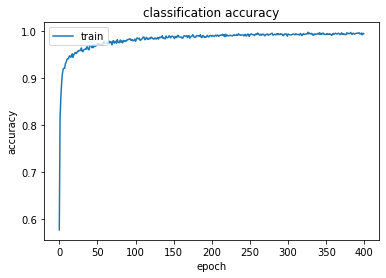

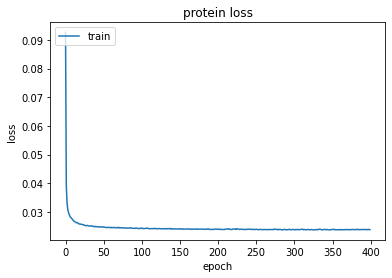

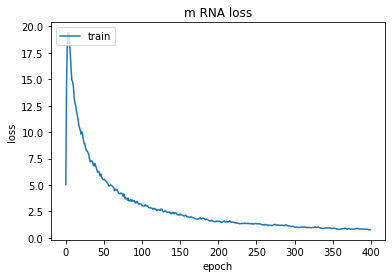

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['classifier_acc'])
# plt.plot(history.history['val_classifier_acc'])
plt.title('classification accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['pro_loss'])
# plt.plot(history.history['val_pro_loss'])
plt.title('protein loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['m_rna_loss'])
# plt.plot(history.history['val_m_rna_loss'])
plt.title('m RNA loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()